In [52]:
#import scraping tools
import requests
import json
from IPython.display import display, HTML, Image

valid = 1
#ask for wikipage and language
while valid != 200:
    url_input = input("What article do you want? ")
    url_input = url_input.strip().replace(" ", "_")
    language = input("In what language would you like to scrape your data?")
    language = language.strip().lower()
    print(f"Alright you want the page {url_input} displayed in {language}")

    #checking if the wikipage is available
    url = f"https://{language}.wikipedia.org/api/rest_v1/page/summary/{url_input}"
    req = requests.get(url)
    valid = req.status_code
    if req.status_code != 200:
        print("Error, could not load the page, try again")

Alright you want the page amsterdam displayed in nl


In [53]:
print("Succes in scraping the data!")

data = json.loads(req.text)
print(data["title"])
print(data["extract"])

Succes in scraping the data!
Amsterdam
Amsterdam is de (titulaire) hoofdstad en naar inwonertal de grootste gemeente van Nederland. De stad, in het Amsterdams ook Mokum genoemd, ligt in de provincie Noord-Holland, aan het IJ, het Noordzeekanaal en de monding van de Amstel. De gemeente Amsterdam telt 859.732 inwoners. Groot-Amsterdam telde eind 2016 1.344.659 inwoners. Het aantal verschillende nationaliteiten in de gemeente behoort tot de hoogste ter wereld.


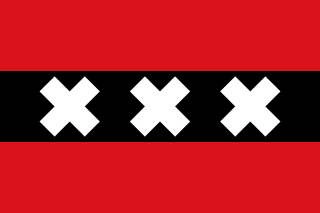

In [54]:
#displaying the picture
if "thumbnail" in data:
    picture = data["thumbnail"]["source"]
    img = Image(picture)
    display(img)
else:
    print("error this page has no picture")

In [55]:
#displaying location
if "coordinates" in data:
    lat = data["coordinates"]["lat"]
    lon = data["coordinates"]["lon"]
    maps = f"http://maps.google.com/?q=@{lat},{lon}"
    display(HTML("<a href=" + maps + ">URL : " + maps + "</a>"))
else:
    print("this page does not have a location")

In [56]:
#searching the related pages
url_related = f"https://{language}.wikipedia.org/api/rest_v1/page/related/{url_input}"
req_related = requests.get(url_related)
valid_related = req_related.status_code
if req_related.status_code != 200:
    print("Error, could not load the page, try again")
else:
    print("succesfully loaded related pages")

succesfully loaded related pages


In [57]:
#getting related pages into a list
data_related = json.loads(req_related.text)
index = 0
list_related = ["","",""]
while index < 3:
    list_related[index] = data_related["pages"][index]
    index = index + 1

In [63]:
#looping through related pages list and displaying contents
index2 = 0
prop_title = []
for page in list_related:
    prop_title.append({"title": list_related[index2]["title"], 
                       "description" : list_related[index2]["extract"], 
                       "url" : list_related[index2]["content_urls"]["desktop"]["page"] })
    print("Title : " + prop_title[index2]["title"])
    print("Despriction : " + prop_title[index2]["description"])
    display(HTML("<a href=" + prop_title[index2]["url"] + ">" + "URL: " + prop_title[index2]["url"] + "</a>"))
    index2 = index2 + 1


Title : Amstel_(rivier)
Despriction : De Amstel is een gekanaliseerde rivier in het zuiden van Noord-Holland, voor een deel op de grens van Noord-Holland met Zuid-Holland en Utrecht. Het gebied langs de rivier wordt aangeduid als Amstelland. Amsterdam heeft zijn naam te danken aan de Amstel.


Title : IJ_(rivier)
Despriction : Het IJ is een rivier, voorheen een zeearm, in Noord-Holland. Het eigenlijke IJ of Binnen-IJ scheidt de Amsterdamse binnenstad van Amsterdam-Noord, en was oorspronkelijk een uitloper van de Zuiderzee. De naam IJ is verwant aan het (West-)Friese Ae, Ee of Die. Dit betekent 'water'.


Title : Rietlanden_(Amsterdam)
Despriction : De Rietlanden is de naam van een vroeger rangeerterrein van de Nederlandse Spoorwegen in het Oostelijk Havengebied van Amsterdam, in het stadsdeel Oost. De naam is ontleend aan vroegere buitendijkse rietlanden aan de zuidelijke oever van het IJ. Nadat het terrein was aangeplempt is hier in het laatste kwart van de 19e eeuw een locomotievendepot en rangeerterrein aangelegd.
